<a href="https://colab.research.google.com/github/MichelBMachado/MAC019/blob/main/MAC019_P2_E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 3 (20 pontos)



A viga abaixo suporta o carregamento indicado. Determine o valor de $x$ que minimize o momento máximo $M_{max}$ na viga. Especifique o valor de $M_{max}$.

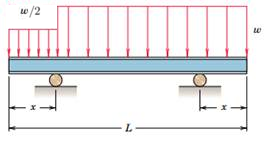

Visando resolver o problema, primeiramente, define-se a variavel "*a*" como a distância entre os apoios e as extremidades da viga e define-se a variavel "*x*", que percorre a viga de 0 até L. Além disso, a viga do exercício foi implementada computacionalmente utilizando a biblioteca BeamBending adotando valores arbitrários com a finalidade de entender o comportamento da mesma quando carregada. O resultado é exposto no diagrama de momento fletor abaixo.

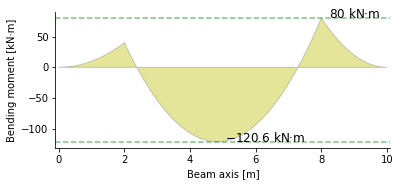

Observando o comportamento da viga e utilizando os conhecimentos de mecânica, é possível inferir que quando os apoios se deslocam em direção ao centro, ou seja, quando o valor de "a" aumenta ocorre uma redução no momento fletor no trecho 2 ao centro da viga. Entretanto, um aumento excessivo de "a" implica em um aumento do momento fletor no trecho 3 a direita da viga e no trecho 1 a equerda da viga, entretanto como existe uma simetria entre os apoios e como a carga do lado esquerdo é metade da do lado direito, podemos desprezar o momento fletor no trecho a esquerda da viga. Com base na figura, também é possível perceber onde ocorrem os pontos de maior intensidade do momento fletor.

Sendo assim, a situação que minimiza o momento fletor máximo ocorre quando o momento fletor máximo do trecho 2 é igual ao momento fletor máximo do trecho 3. Portanto foram estabelecidas equações para os três trechos da viga utilizando a biblioteca SymPy e então, se igualou a equação do trecho 2 no seu ponto de máximo com a equação do trecho 3 também em seu ponto de máximo, assim, se determinou o valor de "a". Com o valor de "a" determinado, pode-se determinar o valor do momento fletor máximo.

[Vídeo da resolução](https://drive.google.com/file/d/1g8Sij_PuECLozRMTqtemAjf1gn27egdd/view?usp=drive_web)

In [ ]:
# Instalação dos pacotes
import sympy as sp
from sympy import Eq
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Aprimoramento da exibição dos resultados
sp.init_printing()

# Definição das variaveis simbólicas
Ay, By, M1, M2, M3, M_max, x2 = sp.symbols('Ay By M1 M2 M3 M_max x2')
w = sp.var('w', positive = True)
x = sp.var('x', positive = True)
a = sp.var('a', positive = True)
L = sp.var('L', positive = True)

In [ ]:
# Equações de equilíbrio 
eq_1 = Eq(Ay + By - w/2*a - w*(L - a), 0)                     # Somatório de Fy
eq_2 = Eq(w/2*a*a/2 - w*(L - a)*(L - a)/2 + By*(L - 2*a), 0)  # Somatório de Ma
display(eq_1, eq_2)                                           # Exibição das equações

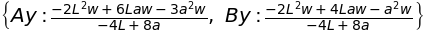

In [ ]:
# Obtenção das reações de apoio
reactions = sp.solve((eq_1, eq_2), (Ay, By))                  # Cálculo das reações de apoio
display(reactions)                                            # Exibição do resultado

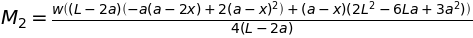

In [ ]:
# Momento fletor no trecho 1: 0 < x < a
eq_3 = Eq(M1, w/2*x*x/2)

# Momento fletor no trecho 2: a < x < L - a
eq_4 = Eq(M2, w/2*a*(x - a/2) - Ay*(x - a) + w*(x - a)*(x - a)/2).subs(reactions).simplify()

# Momento fletor no trecho 3: L - a < x < L
eq_5 = Eq(M3, w/2*a*(x - a/2) - Ay*(x - a) + w*(L - 2*a)*(x - (L/2)) - By*(x - (L - a)) + w*(x - (L - a))*((x - (L - a))/2)).subs(reactions).simplify()

# Exibição das equações de momento fletor
display(eq_3, eq_4, eq_5)

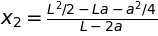

In [ ]:
# Obtendo o ponto de máximo do trecho 2
eq_6 = Eq(x2, sp.solve(eq_4.rhs.diff(x), x)[0])                     # Derivando M2 e igualando a zero
display(eq_6)                                                       # Exibição do resultado

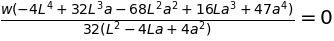

In [ ]:
# Igualando o momento fletor máximo do trecho 2 com o momento fletor máximo do trecho 3
eq_7 = Eq(eq_4.rhs.subs(x, eq_6.rhs) + eq_5.rhs.subs(x, L - a), 0).simplify()
display(eq_7)

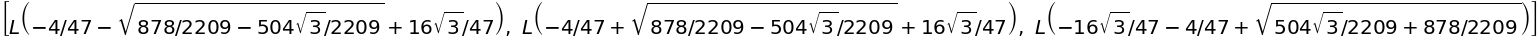

In [ ]:
# Obtenção do valor de "a"
solution = sp.solve(eq_7, a)
display(solution)

In [ ]:
# Simplificação das soluções
display(solution[0].evalf(), solution[1].evalf(), solution[2].evalf())

In [ ]:
# Indicação do valor de a
print("a =", solution[2].evalf())

a = 0.215565630578083*L


In [ ]:
# Substituição do valor de "a" em M2
eq_8 = Eq(M2, eq_4.rhs.subs(a, solution[2]).evalf(4))

# Exibição das equações de momento fletor
display(eq_3, eq_8, eq_5)

In [ ]:
# Substituindo "a" na equação 6
eq_9 = Eq(x2, eq_6.rhs.subs(a, solution[2]).evalf())
display(eq_9)

In [ ]:
# Substituindo x2 na equação 8, obtem-se o momento fletor máximo
eq_10 = Eq(M_max, eq_8.rhs.subs(x, eq_9.rhs).evalf())
display(eq_10)